In [ ]:
'''
柱状图优化，对应论文中的图4、5
'''

### 结构保留

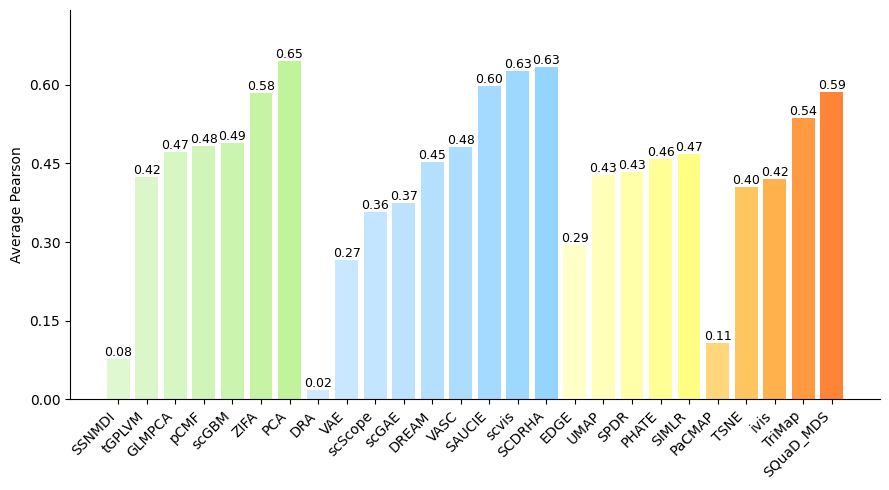

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LinearSegmentedColormap


method_to_group = {

    "PCA": "LP",
    "SSNMID": "LP",
    "SSNMDI": "LP",
    "pCMF": "LP",
    "tGPLVM": "LP",
    "ZIFA": "LP",
    "scGBM": "LP",
    "GLMPCA": "LP",
    "GLM-PCA": "LP",

    "VAE": "DAE",
    "scGAE": "DAE",
    "scGAE_bn": "DAE",
    "scvis": "DAE",
    "scVis": "DAE",
    "SCDRHA": "DAE",
    "SCDrHA": "DAE",
    "VASC": "DAE",
    "DREAM": "DAE",
    "SAUCIE": "DAE",
    "DRA": "DAE",
    "scScope": "DAE",

    "UMAP": "GRAPH",
    "PHATE": "GRAPH",
    "SIMLR": "GRAPH",
    "EDGE": "GRAPH",
    "SPDR": "GRAPH",

    "TSNE": "METRIC",
    "t-SNE": "METRIC",
    "TriMap": "METRIC",
    "PaCMAP": "METRIC",
    "ivis": "METRIC",
    "SQuaD_MDS": "METRIC",
}

group_order = ["LP", "DAE", "GRAPH", "METRIC"]

# ========= 2. 每个类别的自定义渐变色锚点 =========
group_color_stops = {
    "LP": ["#E8FADD", "#D5F6C0", "#C0F39A"],       # 绿色
    "DAE": ["#DBEFFE", "#BDE2FF", "#94D5FF"],      # 蓝色
    "GRAPH": ["#FFFFD7", "#FFFFB2", "#FFFF84"],    # 黄色
    # "METRIC": ["#E4D8E4", "#A47CA4", "#946794"],   # 紫色
    "METRIC": ["#FFE793", "#FFBC52", "#FF8435"],   # 橙色
    # "METRIC": ["#F3C4D7", "#C7ACE5", "#C7ACE5"],   # 紫色2
    # "METRIC": ["#C0F7B2", "#79EDC2", "#49E7CE"],   # 青色
    # "METRIC": ["#FE9B6B","#FC5945","#E10807"] # 红色
    # "METRIC": ["#43616B","#2C525D","#054760"] # 青色
}


csv_path = "/home/henu/work/result/score/dr3.csv"
metric = "Pearson"

df = pd.read_csv(csv_path)

# 若没有名为 metric 的列，则用第二列
if metric not in df.columns and len(df.columns) >= 2:
    metric = df.columns[1]

# 去掉不需要的方法
df = df[df["Method"] != "ParametricUMAP200"].copy()
df = df[df["Method"] != "ParametricUMAP50"].copy()
df = df[df["Method"] != "SQuaD_MDS"].copy()  # 注意这里你之前是去掉原来的 SQuaD_MDS

# 将 SQuaD_MDS_hybrid 的名字改为 SQuaD_MDS
df["Method"] = df["Method"].replace({"SQuaD_MDS_hybrid": "SQuaD_MDS"})

# 只保留 Method 和 指标列
df = df[["Method", metric]].copy()

# ========= 4. 加入类别信息，并按「类别 -> 指标升序」排序 =========
df["Group"] = df["Method"].map(method_to_group)

# 若有方法没有被映射到任何类别，可以先过滤掉
df = df.dropna(subset=["Group"]).copy()

# 按指定顺序设置 Group 为有序类别
df["Group"] = pd.Categorical(df["Group"],
                             categories=group_order,
                             ordered=True)

# 按类别 + 指标从小到大排序
df = df.sort_values(["Group", metric], ascending=[True, True]).reset_index(drop=True)

# ========= 5. 为每个类别生成“自定义渐变色”，分数越大颜色越深 =========
colors = [None] * len(df)

for g in group_order:
    # 取出属于该组的行（位置索引）
    idx = np.where(df["Group"] == g)[0]
    n = len(idx)
    if n == 0:
        continue

    # 根据 anchor hex 列表生成一个 LinearSegmentedColormap
    stops = group_color_stops[g]
    cmap = LinearSegmentedColormap.from_list(f"cmap_{g}", stops)

    # 当前类内部已经按 metric 升序排序，
    # 用 0.2~1.0 的区间避免太白，数值越大颜色越深
    vals = np.linspace(0.2, 1.0, n)
    for i, pos in enumerate(idx):
        colors[pos] = cmap(vals[i])

# ========= 6. 画图 =========
plt.style.use("default")
plt.figure(figsize=(9, 5))
bars = plt.bar(df["Method"], df[metric], color=colors)

ymax = df[metric].max() if len(df) else 1.0
plt.ylim(0, ymax * 1.15)

plt.ylabel(f"Average {metric}")
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6))

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xticks(rotation=45, ha="right")

# 柱顶标数值
for rect, val in zip(bars, df[metric].values):
    height = rect.get_height()
    plt.text(
        rect.get_x() + rect.get_width() / 2,
        height,
        f"{val:.2f}",
        ha="center",
        va="bottom",
        fontsize=9,
    )

plt.tight_layout()

out_svg = "/home/henu/work/other/1/topo/new/Pearson.svg"
plt.savefig(out_svg)
plt.show()

### 聚类

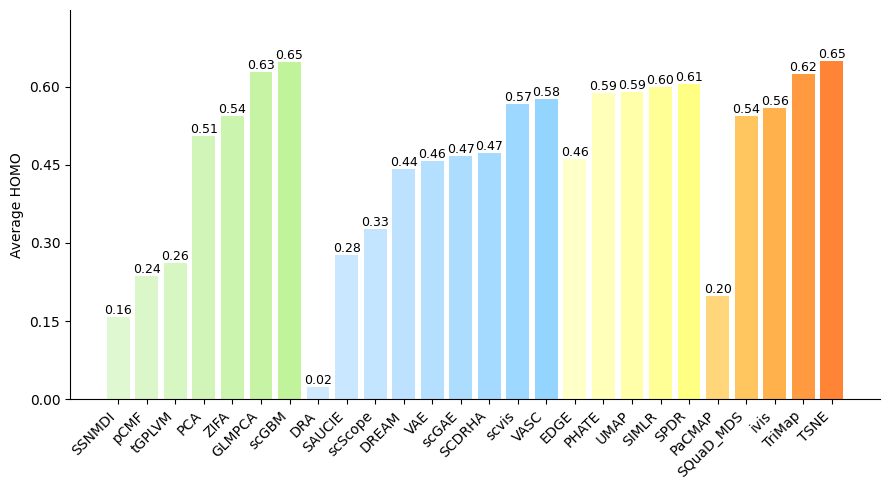

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LinearSegmentedColormap


method_to_group = {

    "PCA": "LP",
    "SSNMID": "LP",
    "SSNMDI": "LP",
    "pCMF": "LP",
    "tGPLVM": "LP",
    "ZIFA": "LP",
    "scGBM": "LP",
    "GLMPCA": "LP",
    "GLM-PCA": "LP",

    "VAE": "DAE",
    "scGAE": "DAE",
    "scGAE_bn": "DAE",
    "scvis": "DAE",
    "scVis": "DAE",
    "SCDRHA": "DAE",
    "SCDrHA": "DAE",
    "VASC": "DAE",
    "DREAM": "DAE",
    "SAUCIE": "DAE",
    "DRA": "DAE",
    "scScope": "DAE",

    "UMAP": "GRAPH",
    "PHATE": "GRAPH",
    "SIMLR": "GRAPH",
    "EDGE": "GRAPH",
    "SPDR": "GRAPH",

    "TSNE": "METRIC",
    "t-SNE": "METRIC",
    "TriMap": "METRIC",
    "PaCMAP": "METRIC",
    "ivis": "METRIC",
    "SQuaD_MDS": "METRIC",
}

group_order = ["LP", "DAE", "GRAPH", "METRIC"]

# ========= 2. 每个类别的自定义渐变色锚点 =========
group_color_stops = {
    "LP": ["#E8FADD", "#D5F6C0", "#C0F39A"],       # 绿色
    "DAE": ["#DBEFFE", "#BDE2FF", "#94D5FF"],      # 蓝色
    "GRAPH": ["#FFFFD7", "#FFFFB2", "#FFFF84"],    # 黄色
    # "METRIC": ["#E4D8E4", "#A47CA4", "#946794"],   # 紫色
    "METRIC": ["#FFE793", "#FFBC52", "#FF8435"],   # 橙色
    # "METRIC": ["#FE9B6B","#FC5945","#E10807"] # 红色
    # "METRIC": ["#43616B","#2C525D","#054760"] # 青色
}


csv_path = "/home/henu/work/result/score/cluster/kmeans/HOMO.csv"
metric = "HOMO"

df = pd.read_csv(csv_path)

# 若没有名为 metric 的列，则用第二列
if metric not in df.columns and len(df.columns) >= 2:
    metric = df.columns[1]

# 去掉不需要的方法
df = df[df["Method"] != "ParametricUMAP200"].copy()
df = df[df["Method"] != "ParametricUMAP50"].copy()
df = df[df["Method"] != "SQuaD_MDS"].copy()  # 注意这里你之前是去掉原来的 SQuaD_MDS

# 将 SQuaD_MDS_hybrid 的名字改为 SQuaD_MDS
df["Method"] = df["Method"].replace({"SQuaD_MDS_hybrid": "SQuaD_MDS"})

# 只保留 Method 和 指标列
df = df[["Method", metric]].copy()

# ========= 4. 加入类别信息，并按「类别 -> 指标升序」排序 =========
df["Group"] = df["Method"].map(method_to_group)

# 若有方法没有被映射到任何类别，可以先过滤掉
df = df.dropna(subset=["Group"]).copy()

# 按指定顺序设置 Group 为有序类别
df["Group"] = pd.Categorical(df["Group"],
                             categories=group_order,
                             ordered=True)

# 按类别 + 指标从小到大排序
df = df.sort_values(["Group", metric], ascending=[True, True]).reset_index(drop=True)

# ========= 5. 为每个类别生成“自定义渐变色”，分数越大颜色越深 =========
colors = [None] * len(df)

for g in group_order:
    # 取出属于该组的行（位置索引）
    idx = np.where(df["Group"] == g)[0]
    n = len(idx)
    if n == 0:
        continue

    # 根据 anchor hex 列表生成一个 LinearSegmentedColormap
    stops = group_color_stops[g]
    cmap = LinearSegmentedColormap.from_list(f"cmap_{g}", stops)

    # 当前类内部已经按 metric 升序排序，
    # 用 0.2~1.0 的区间避免太白，数值越大颜色越深
    vals = np.linspace(0.2, 1.0, n)
    for i, pos in enumerate(idx):
        colors[pos] = cmap(vals[i])

# ========= 6. 画图 =========
plt.style.use("default")
plt.figure(figsize=(9, 5))
bars = plt.bar(df["Method"], df[metric], color=colors)

ymax = df[metric].max() if len(df) else 1.0
plt.ylim(0, ymax * 1.15)

plt.ylabel(f"Average {metric}")
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=6))

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.xticks(rotation=45, ha="right")

# 柱顶标数值
for rect, val in zip(bars, df[metric].values):
    height = rect.get_height()
    plt.text(
        rect.get_x() + rect.get_width() / 2,
        height,
        f"{val:.2f}",
        ha="center",
        va="bottom",
        fontsize=9,
    )

plt.tight_layout()

out_svg = "/home/henu/work/other/1/kmeans/new/HOMO.svg"
plt.savefig(out_svg)
plt.show()